# **Recopilación y almacenamiento de datos (SQL y Python)**

## **Contenido**<a id='toc0_'></a>    
- **Recopilación y almacenamiento de datos (SQL)**
  - Introducción
  - Recuperación de datos
    - Trabajar consultas SQL en BD
  - Cargar archivos y visualizar los datos
  - Preparación de datos
  - Análisis de datos
  - Hipótesis
  - Conclusiones y Recomendaciones

## Introducción

Como analista para una empresa de taxis, una nueva empresa de viajes compartidos que se está lanzando en Chicago. La tarea es encontrar patrones en la información disponible, seguidamente comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes. Las bases de datos que se utilizaran para el estudio es de noviembre de 2017.

- **Plan de trabajo:**
    1. **Recuperación de datos:** Una breve muestra de como se obtienen los datos, utilizando SQL en python por medio de pyspark.
    1. **Visualizar los datos:** tener el primer contactó con los datos y priorizar la visualización en las necesidades para el preprocesamiento.
    1. **Preprocesamiento y preparación de datos:** Según los resultados obtenidos en la visualización de datos, se corregirán los siguientes puntos:
        - Tipos de datos.
        - Datos ausentes.
        - Encabezados en mayúscula.
        - Filas duplicadas. 

    3. **Análisis de datos:** Utilizar todas las herramientas, tecnologías y procesos para encontrar tendencias y lograr una propuesta con gran robustez numérica.
    4. **Probar hipótesis:** Ya con el análisis realizado y con los patrones identificados, corroborar con las pruebas de hipótesis. 
    5. **Conclusiones y recomendaciones:** 
        - Comprender las preferencias de los pasajeros con los patrones encontrados y declarar las características fundamentales de como afectan los factores externos en los viajes.
        - Especificar las problemáticas encontradas en los datos suministrados conformando un informe de errores.

## Recuperación de datos

In [72]:
import pandas as pd
import requests
import re
from bs4 import BeautifulSoup

In [73]:
URL = 'https://practicum-content.s3.us-west-1.amazonaws.com/data-analyst-eng/moved_chicago_weather_2017.html'

req = requests.get(URL)
soup = BeautifulSoup(req.text,'lxml')

In [74]:
heading_table = []
for row in soup.find_all('th'):
    heading_table.append(row.text)

data_table = []
for row in soup.find_all('tr'):
    if not row.find_all('th'):
        data_table.append([element.text for element in row.find_all('td')])

In [75]:
weather_records = pd.DataFrame(data_table, columns = heading_table)
weather_records.columns = weather_records.columns.str.lower()

In [76]:
weather_records= weather_records.rename(columns={'date and time': 'date_and_time'})

In [77]:
weather_records

,date_and_time,temperature,description
0,2017-11-01 00:00:00,276.150,broken clouds
1,2017-11-01 01:00:00,275.700,scattered clouds
2,2017-11-01 02:00:00,275.610,overcast clouds
3,2017-11-01 03:00:00,275.350,broken clouds
4,2017-11-01 04:00:00,275.240,broken clouds
...,...,...,...
692,2017-11-29 20:00:00,281.340,few clouds
693,2017-11-29 21:00:00,281.690,sky is clear
694,2017-11-29 22:00:00,281.070,few clouds
695,2017-11-29 23:00:00,280.060,sky is clear


In [78]:
weather_records.to_csv('weather_records.csv', index=False)

## Trabajar consultas SQL en BD

In [79]:
# Importar librerías
from pyspark.sql import SparkSession

In [80]:
APP_NAME = "DataFrames"
SPARK_URL = "local[*]"

spark = SparkSession.builder.appName(APP_NAME).getOrCreate()

prueba = spark.read.load('weather_records.csv', 
                       format='csv', header='true', inferSchema='true')

prueba = prueba.fillna(0)

prueba.createOrReplaceTempView("prueba")

In [81]:
print(spark.sql('SELECT * FROM prueba LIMIT 5').show())

+-------------------+-----------+----------------+
|      date_and_time|temperature|     description|
+-------------------+-----------+----------------+
|2017-11-01 00:00:00|     276.15|   broken clouds|
|2017-11-01 01:00:00|      275.7|scattered clouds|
|2017-11-01 02:00:00|     275.61| overcast clouds|
|2017-11-01 03:00:00|     275.35|   broken clouds|
|2017-11-01 04:00:00|     275.24|   broken clouds|
+-------------------+-----------+----------------+

None


In [82]:
print(spark.sql('SELECT EXTRACT(DAY FROM date_and_time) AS day, CAST(AVG(temperature) AS INT) AS avg_temperature FROM prueba GROUP BY EXTRACT(DAY FROM date_and_time) ORDER BY EXTRACT(DAY FROM date_and_time)').show())

+---+---------------+
|day|avg_temperature|
+---+---------------+
|  1|            276|
|  2|            281|
|  3|            280|
|  4|            280|
|  5|            283|
|  6|            278|
|  7|            277|
|  8|            275|
|  9|            276|
| 10|            269|
| 11|            271|
| 12|            276|
| 13|            275|
| 14|            276|
| 15|            281|
| 16|            275|
| 17|            276|
| 18|            279|
| 19|            274|
| 20|            275|
+---+---------------+
only showing top 20 rows

None


## Cargar archivos y visualizar los datos

In [83]:
#Importar librerías
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as st

In [84]:
#Cargar los archivos
sql1 = pd.read_csv('project_sql_result_01.csv')
sql2 = pd.read_csv('project_sql_result_04.csv')
sql3 = pd.read_csv('project_sql_result_07.csv')

In [85]:
#Información general
print(sql1.head())
print()
sql1.info()

                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                 Medallion Leasin         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [86]:
sql1.duplicated().sum()

0

- Descripción de datos(sql1)
  - `company_name`: nombre de la empresa de taxis.
  - `trips_amount`: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017.

In [87]:
#Información general
print(sql2.head())
print()
sql2.info()

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [88]:
sql2.duplicated().sum()

0

- Descripción de datos(sql2)
  - `dropoff_location_name`: nombre de los barrios de Chicago donde se finalizaron los viajes.
  - `average_trips`: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.

In [89]:
#Información general
print(sql3.head())
print()
sql3.info()

              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [90]:
sql3.duplicated().sum()

197

In [91]:
sql3.query('weather_conditions == "Bad" & duration_seconds == 1440.0')

,start_ts,weather_conditions,duration_seconds
54,2017-11-18 10:00:00,Bad,1440.0
196,2017-11-18 10:00:00,Bad,1440.0
340,2017-11-18 08:00:00,Bad,1440.0


- Descripción de datos(sql3)
  - `start_ts`: fecha y hora de la recogida.
  - `weather_conditions`: condiciones climáticas en el momento en qeu comenzó el viaje.
  - `duration_seconds`: duración del viaje en segundos.

- En la visualización de los dataframes, los datasets nombrados sql1 y sql2 no tienen errores en los tipos de datos, no hay valores ausentes y los nombres de las columnas son correctos. Ahora bien, la base de datos llamada sql3, no tiene valores ausentes y los nombres de las columnas son correctos, pero los tipos de datos en las columnas `start_ts` y `duration_seconds` se deben corregir.
- Por otro lado, sql1 y sql2 no tienen filas duplicadas, pero sql3 si tiene 197 filas duplicadas. 

## Preparación de datos

In [92]:
#Transformar tipos de datos incorrectos
sql3['duration_seconds'] = sql3['duration_seconds'].astype(int)
sql3['start_ts'] = pd.to_datetime(sql3['start_ts'],format= '%Y-%m-%d %H:%M:%S')

In [93]:
#Eliminar duplicados
sql3 = sql3.drop_duplicates()

In [94]:
sql3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 871 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            871 non-null    datetime64[ns]
 1   weather_conditions  871 non-null    object        
 2   duration_seconds    871 non-null    int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 23.8+ KB


## Análisis de datos

In [95]:
#Cual es el Top 10 barrios donde finalizan los recorridos
sql2_filter = sql2.sort_values('average_trips',ascending = False).head(10)
sql2_filter

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


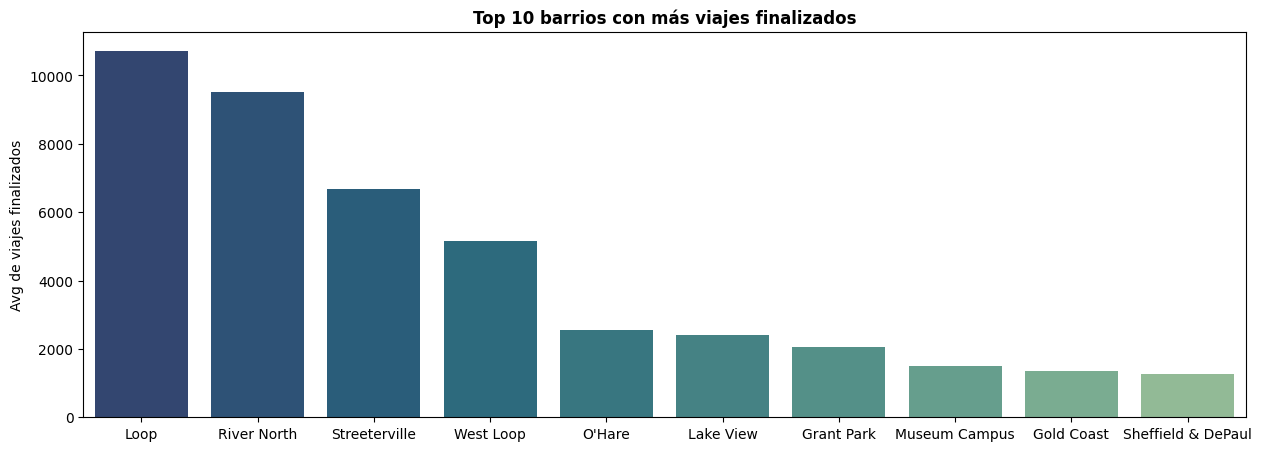

In [96]:
fig = plt.figure(figsize=(15, 5))
sns.barplot(data=sql2_filter, 
            x='dropoff_location_name', 
            y='average_trips', 
            ax=fig.add_subplot(), 
            palette = 'crest_r')
plt.ylabel('Avg de viajes finalizados')
plt.xlabel('')
plt.title('Top 10 barrios con más viajes finalizados', fontweight = 'bold')
plt.show()

Entre los 94 barrios que tienen a cabo viajes, los cuatro mejores barrios que se indican en la gráfica, se encuentran ubicados en el centro de Chicago, quien probablemente es la zona con más actividad en la ciudad. Además, el barrio que ostenta mayores frecuencias fue Loop, el cual se caracteriza por ser el prestigioso distrito central de negocios en la ciudad de Chicago, y su enorme actividad de transporte lo demuestra.

In [97]:
Q1 = sql2['average_trips'].quantile(0.25)
Q3 = sql2['average_trips'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
inferior_limit = Q1 - 1.5 * IQR

In [98]:
inferior_limit, upper_limit

(-412.6208333333334, 725.7458333333334)

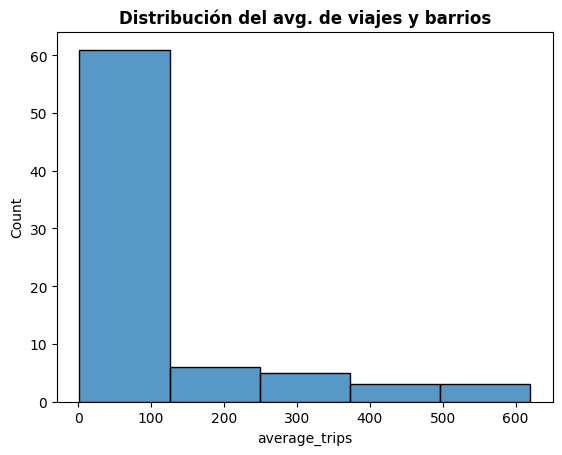

In [99]:
sql2_avg_trips = sql2.query('average_trips <= @upper_limit')
_ = sns.histplot(sql2_avg_trips['average_trips'], bins = 5)
plt.title('Distribución del avg. de viajes y barrios', fontweight = 'bold')
plt.show()

In [100]:
#Top 10 mejores empresas de taxi
sql1_filter = sql1.sort_values('trips_amount',ascending = False).head(10)
sql1_filter

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


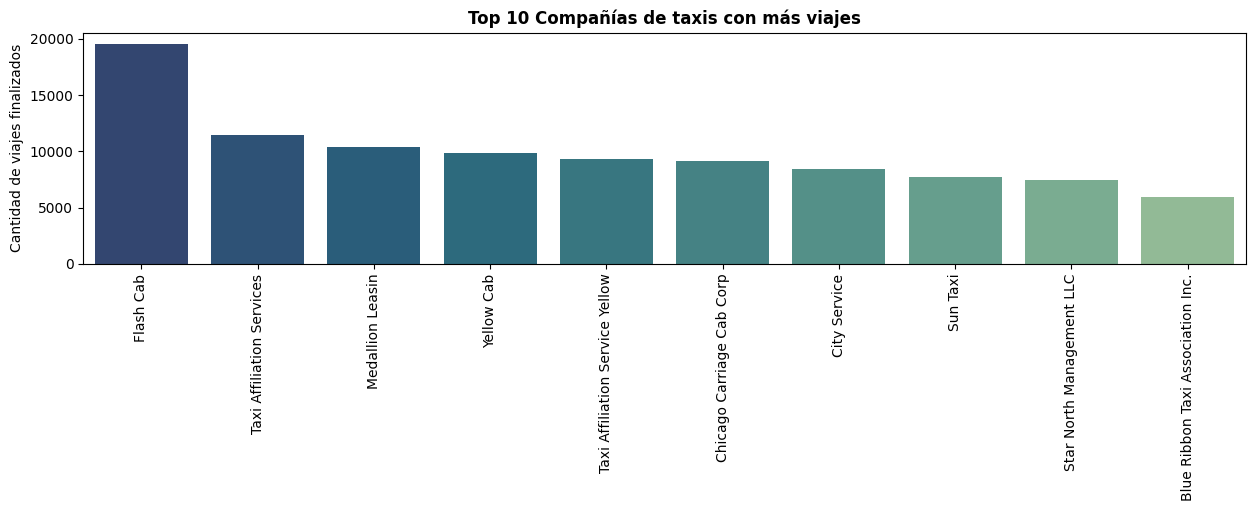

In [101]:
fig = plt.figure(figsize=(15, 3))
sns.barplot(data=sql1_filter,
            x='company_name',
            y='trips_amount',
            ax=fig.add_subplot(),
            palette = 'crest_r'
            )
plt.ylabel('Cantidad de viajes finalizados')
plt.xlabel('')
plt.title('Top 10 Compañías de taxis con más viajes', fontweight = 'bold')
plt.xticks(rotation=90)
plt.show()

La compañía de taxis con mayor número de desplazamientos es Flash Cab, con una cifra de, 19558, y supera a su rival más cercano por casi el doble de desplazamientos. Flash Cab cuenta con seis locales y se encuentran situados alrededor de Loop, River North, Streeterville y West Loop. Esto implica que los locales se están situados en los cuatro barrios con mayor uso de taxis.

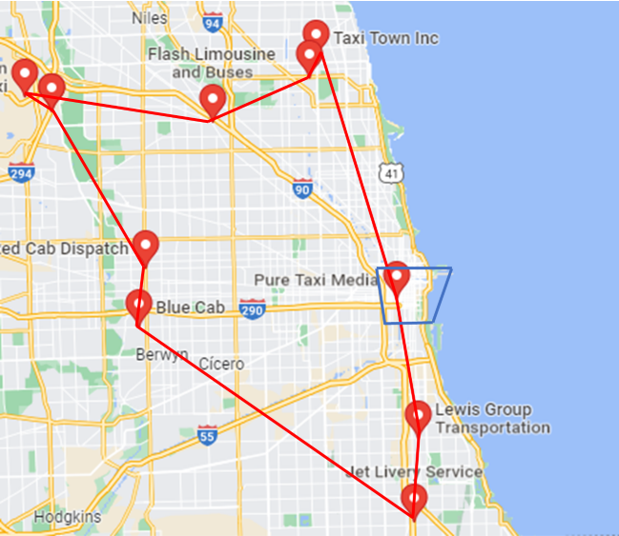

In [102]:
# En lo anterior descrito, visualizamos la distribución de de los locales de Flash Cab
import IPython.display
image_path = 'Chicago.png'

# Cargar imagen
IPython.display.display(IPython.display.Image(image_path))

- La zona encerrada en rojo son los locales de Flash Cab y la de color azul es el barrio Loop.

## Hipótesis

Antes de aplicar la hipótesis, verificar que los valores no tengan atípicos que puedan alterar el resultado, y generen una interpretación errada en la duración de los viajes según su condición climática.

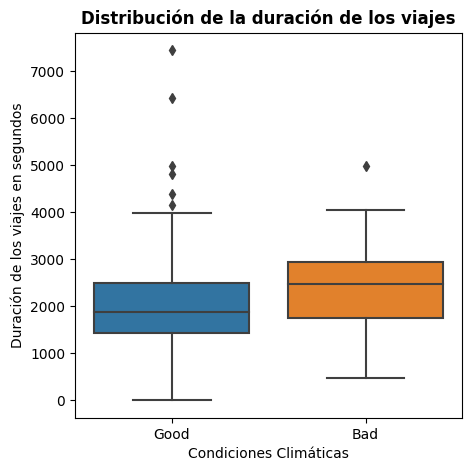

In [103]:
#Verificar si hay valores atípicos gráficamente
fig= plt.figure(figsize=(5,5))
sns.boxplot(sql3, 
            ax= fig.add_subplot(),
            x='weather_conditions',
            y ='duration_seconds',
            )
plt.title('Distribución de la duración de los viajes',fontweight='bold')
plt.xlabel('Condiciones Climáticas')
plt.ylabel('Duración de los viajes en segundos')
plt.show()

In [104]:
#Calcular los limites superiores
upper_limit = {}
for weather in sql3['weather_conditions'].unique():
    
    Q1 = sql3[sql3['weather_conditions'] == weather]['duration_seconds'].quantile(0.25)
    Q3 = sql3[sql3['weather_conditions'] == weather]['duration_seconds'].quantile(0.75)
    IQR = Q3 - Q1 
    upper_limit[weather] = Q3 + 1.5 * IQR

In [105]:
#Verificar el funcionamiento del bucle
upper_limit

{'Good': 4075.5, 'Bad': 4731.0}

In [106]:
#Aplicar los filtros para los limites superiores
conditions1= "weather_conditions == 'Good' & duration_seconds <=@upper_limit['Good']"
conditions2= "| weather_conditions == 'Bad' & duration_seconds <=@upper_limit['Bad']"
sql3_filter = sql3.query(conditions1 + conditions2)

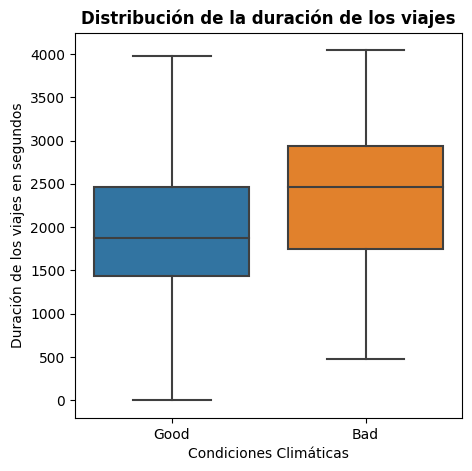

In [107]:
#Verificar nuevamente los atípicos en gráfica
fig= plt.figure(figsize=(5,5))
sns.boxplot(sql3_filter, 
            ax= fig.add_subplot(),
            x='weather_conditions',
            y ='duration_seconds',
            )
plt.title('Distribución de la duración de los viajes',fontweight='bold')
plt.xlabel('Condiciones Climáticas')
plt.ylabel('Duración de los viajes en segundos')
plt.show()

Ya sin valores atípicos, se puede aplicar la hipótesis.

- **Hipótesis: ¿La duración promedio de los viajes desde el barrio Loop hasta el aeropuerto internacional O'Hare cambia los sábados lluviosos?**
  - **H_0:** La duración promedio de los viajes desde el barrio Loop hasta el aeropuerto internacional O'Hare es similar los sábados lluviosos? 
  - **H_1:** La duración promedio de los viajes desde el barrio Loop hasta el aeropuerto internacional O'Hare no es similar los sábados lluviosos?

In [108]:
sql3_bad = sql3_filter.query('weather_conditions == "Bad"')['duration_seconds']
sql3_good = sql3_filter.query('weather_conditions == "Good"')['duration_seconds']
print(f' La media de duración con un mal tiempo climático es: {sql3_bad.mean()}.')
print(f'Y la media de duración cuando hay buen tiempo climático es: {sql3_good.mean()}')

 La media de duración con un mal tiempo climático es: 2391.7414965986395.
Y la media de duración cuando hay buen tiempo climático es: 2004.4058577405858


In [109]:
print(round(np.var(sql3_bad),2))
print(round(np.var(sql3_good),2))

519555.38
497289.3


Con los cálculos de las media y las varianzas de las 2 poblaciones, se puede interpretar que las medias de ambas poblaciones no son similares. Sin embargo, se comprobara con una prueba de hipótesis.

- **Hipótesis: ¿Las varianzas de las poblaciones son similares?**
  - **H_0:** ¿Las varianzas de las poblaciones si son similares?
  - **H_1:** ¿Las varianzas de las poblaciones no son similares?

In [110]:
alpha = 0.05
results =st.levene(sql3_bad,sql3_good)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print('Se rechaza la hipótesis nula')
else:
    print('No se rechaza la hipótesis nula')

p-value: 0.7937159376563715
No se rechaza la hipótesis nula


Tras aplicar la hipótesis en las varianzas y teniendo como consecuencia que, si son similares, puede calcularse la hipótesis principal.

In [111]:
alpha = 0.05
results =st.ttest_ind(sql3_bad,sql3_good, equal_var = True)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print('Se rechaza la hipótesis nula')
else:
    print('No se rechaza la hipótesis nula')

p-value: 2.3363796620667475e-09
Se rechaza la hipótesis nula


In [112]:
#Diferencia en la media de duración de según la condición climática
diff = sql3_bad.mean() - sql3_good.mean()
round(diff, 2)

387.34

Como conclusión a la hipótesis, la duración media de los viajes realizados los sábados de lluvia desde el barrio Loop hasta el aeropuerto internacional O' Hare, no son similares. La media de diferencia entre viajar con lluvia es de 387.33 segundos más larga, que cuando se viaja sin lluvia. En total, seis minutos más de viaje.

## Conclusiones y Recomendaciones

**1. Visualizar los datos:** el conjunto de datos original eran tres bases de datos extraídas con SQL, donde nos otorgaban información sobre los viajes realizados en el mes de Noviembre de 2017, las compañías de taxis, cantidad de viajes, como estaba el clima en cada viaje, entre otros. No había ausentes en ninguna de las bases de datos pero en la base de datos del clima, si habían filas duplicadas y en la columna `start_ts` las fechas estaban en un formato de datos incorrecto.

**2. Preprocesamiento y preparación de datos:** se corrigieron los tipos de datos en la columna `start_ts` y se eliminaron los duplicados en la base de datos del clima. Esto ha asegurado que todos los datos en la columna sean precisos y consistentes.

Estos cambios han mejorado  un poco la calidad de los datos y han hecho que el conjunto de datos sea más preciso.

**3. Análisis de los datos:** el enfoque para el análisis de datos fue centrado en los siguientes puntos:

- **Encontrar los barrios donde se finalizaron más viajes:** el fin de conocer el top diez de los barrios mas concurridos, es saber hacia donde de están movilizando los pasajeros. Sin embargo, es interesante ver como los cuatro primeros puestos, se encuentran ubicados en el centro de Chicago y el barrio que ostenta mayores frecuencias fue Loop, el cual se caracteriza por ser el prestigioso distrito central de negocios en la ciudad de Chicago.


- **Detectar las empresas de taxis con mas viajes completados:** saber porque una empresa de taxis tiene más viajes que otra, depende de muchos factores como: ubicación de sus vehículos, trato hacia el pasajero, costo y accesibilidad. La compañía de taxis con mayor número de desplazamientos es Flash Cab, con una cifra de, 19558, y supera a su rival más cercano por casi el doble de desplazamientos. Flash Cab cuenta con seis localidades y se encuentran situados alrededor de Loop, River North, Streeterville y West Loop. Esto implica que las localidades se sitúan en los cuatro barrios con mayor uso de taxis.

**4. Hipótesis:**
Una hipótesis es una declaración que puede ser probada o falsa. Es una explicación posible de un fenómeno que puede ser verificada o refutada por la evidencia. Las hipótesis son importantes en la investigación científica porque proporcionan una dirección para la investigación y ayudan a los investigadores a desarrollar nuevas teorías.

En este estudio, se planteo una hipótesis:
- ¿La duración promedio de los viajes desde el barrio Loop hasta el aeropuerto internacional O'Hare cambia los sábados lluviosos?

El resultado de este estudio mostró que, la duración media de los viajes realizados los sábados de lluvia desde el barrio Loop hasta el aeropuerto internacional O' Hare, no son similares. La media de diferencia entre viajar con lluvia es de 387.33 segundos más larga, que cuando se viaja sin lluvia. En total, seis minutos más de viaje. Esto significa que hay evidencia suficiente para decir que los viajes lluviosos generan menos traslados por taxista.

El p-valor de 2.3363796620667466e-09 es mucho menor que el nivel de significancia de 0.05. Por lo tanto, hay evidencia suficiente para rechazar la hipótesis nula.La probabilidad de obtener un resultado para que la hipótesis sea verdadera, es extremadamente baja, por lo que podemos concluir que la hipótesis nula es falsa.

**5. Conclusión Final:** las preferencias para los viajeros es:

- Dirigirse al centro de Chicago es por lo que más se utilizan taxis, específicamente para los barrios Loop, River North, Streeterville y West Loop.


- Los pasajeros tiene un claro favorito en su compañía taxis preferida y es Flash Cab, la cual utilizan el doble de veces que Taxi Affilation Services. Una de las razones por las que pueden preferir esta empresa, es que sus taxis están situados entre los cuatro barrios con más terminación de viajes. Ahora, realizar un estudio más a fondo de las características positivas de esta empresa en referencia de las otras, sería interesante y evaluaría si existen otras condiciones por la cual dicha empresa es tan utilizada por los pasajeros.


- La lluvia es un factor determinante en la duración de los viajes, tener un clima lluvioso implica manejar con más cautela y por ende genera que el flujo vehicular se vea afectado. Un clima lluvioso conlleva más viajes para las compañías, por las personas que no quieren mojarse, pero requiere más taxistas para poder cumplir con todas las solicitudes, puesto que cada viaje es más prolongado.